In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
from collections import Counter
from wordcloud import WordCloud

In [ ]:
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /Users/chris/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/chris/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Part I: Data Preparation

In [ ]:
df = pd.read_json("fashion_products_dataset.json")
print(df.shape)
df.head()

(28080, 17)


,_id,actual_price,average_rating,brand,category,crawled_at,description,discount,images,out_of_stock,pid,product_details,seller,selling_price,sub_category,title,url
0,fa8e22d6-c0b6-5229-bb9e-ad52eda39a0a,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:51,Yorker trackpants made from 100% rich combed c...,69% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EA7H5FYZH,"[{'Style Code': '1005COMBO2'}, {'Closure': 'El...",Shyam Enterprises,921,Bottomwear,Solid Women Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
1,893e6980-f2a0-531f-b056-34dd63fe912c,"1,499",3.9,York,Clothing and Accessories,2021-02-10 20:11:52,Yorker trackpants made from 100% rich combed c...,66% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EJZV2UVRZ,"[{'Style Code': '1005BLUE'}, {'Closure': 'Draw...",Shyam Enterprises,499,Bottomwear,Solid Men Blue Track Pants,https://www.flipkart.com/yorker-solid-men-blue...
2,eb4c8eab-8206-59d0-bcd1-a724d96bf74f,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:52,Yorker trackpants made from 100% rich combed c...,68% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EHFCY5Z4Y,"[{'Style Code': '1005COMBO4'}, {'Closure': 'El...",Shyam Enterprises,931,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
3,3f3f97bb-5faf-57df-a9ff-1af24e2b1045,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:53,Yorker trackpants made from 100% rich combed c...,69% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9ESZZ7YWEF,"[{'Style Code': '1005COMBO3'}, {'Closure': 'El...",Shyam Enterprises,911,Bottomwear,Solid Women Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
4,750caa3d-6264-53ca-8ce1-94118a1d8951,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:53,Yorker trackpants made from 100% rich combed c...,68% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EVXKBSUD7,"[{'Style Code': '1005COMBO1'}, {'Closure': 'Dr...",Shyam Enterprises,943,Bottomwear,"Solid Women Brown, Grey Track Pants",https://www.flipkart.com/yorker-solid-men-brow...


### 1. Preprocessing

As a first step, you must pre-process the documents. In particular, for the text fields (title,
description) you should:

- Removing stop words
- Tokenization
- Removing punctuation marks
- Stemming
- and... anything else you think it's needed (bonus point)

In [ ]:
def build_terms(line):
    stemmer = PorterStemmer()
    stop_words = set(stopwords.words("english"))
    
    line = re.sub(r"[^a-zA-Z0-9\s\-x]", " ", line) # removing punctuation and digits
    line = line.lower() # transform in lowercase
    line = line.split() # tokenization
    # line = [w for w in line if w not in stop_words] # remove stop words
    line = [w for w in line if w and w not in stop_words and w not in {"nan","none","null"}]
    line = [stemmer.stem(w) for w in line] # stemming

    return line

### 2. Select columns

Take into account that for future queries, the final output must return (when present) the
following information for each of the selected documents:
pid, title, description, brand, category, sub_category, product_details, seller, out_of_stock,
selling_price, discount, actual_price, average_rating, url.

In [ ]:
keep = ["pid", "title", "description", "brand", "category", "sub_category",
        "product_details", "seller", "out_of_stock", "selling_price",
        "discount", "actual_price", "average_rating", "url"]

df = df.reindex(columns=keep)

In [ ]:
df.head()

,pid,title,description,brand,category,sub_category,product_details,seller,out_of_stock,selling_price,discount,actual_price,average_rating,url
0,TKPFCZ9EA7H5FYZH,Solid Women Multicolor Track Pants,Yorker trackpants made from 100% rich combed c...,York,Clothing and Accessories,Bottomwear,"[{'Style Code': '1005COMBO2'}, {'Closure': 'El...",Shyam Enterprises,False,921,69% off,"2,999",3.9,https://www.flipkart.com/yorker-solid-men-mult...
1,TKPFCZ9EJZV2UVRZ,Solid Men Blue Track Pants,Yorker trackpants made from 100% rich combed c...,York,Clothing and Accessories,Bottomwear,"[{'Style Code': '1005BLUE'}, {'Closure': 'Draw...",Shyam Enterprises,False,499,66% off,"1,499",3.9,https://www.flipkart.com/yorker-solid-men-blue...
2,TKPFCZ9EHFCY5Z4Y,Solid Men Multicolor Track Pants,Yorker trackpants made from 100% rich combed c...,York,Clothing and Accessories,Bottomwear,"[{'Style Code': '1005COMBO4'}, {'Closure': 'El...",Shyam Enterprises,False,931,68% off,"2,999",3.9,https://www.flipkart.com/yorker-solid-men-mult...
3,TKPFCZ9ESZZ7YWEF,Solid Women Multicolor Track Pants,Yorker trackpants made from 100% rich combed c...,York,Clothing and Accessories,Bottomwear,"[{'Style Code': '1005COMBO3'}, {'Closure': 'El...",Shyam Enterprises,False,911,69% off,"2,999",3.9,https://www.flipkart.com/yorker-solid-men-mult...
4,TKPFCZ9EVXKBSUD7,"Solid Women Brown, Grey Track Pants",Yorker trackpants made from 100% rich combed c...,York,Clothing and Accessories,Bottomwear,"[{'Style Code': '1005COMBO1'}, {'Closure': 'Dr...",Shyam Enterprises,False,943,68% off,"2,999",3.9,https://www.flipkart.com/yorker-solid-men-brow...


### 3. Categorical fields

Decide how to handle the fields category, sub_category, brand, product_details, and seller during pre-processing. Should they be merged into a single text field, indexed as separate fields in the inverted index or any other alternative? Justify your choice, considering how their distinctiveness may affect retrieval effectiveness. What are pros and cons of each approach?

Conservamos los campos nombrados por separado y procesados, y también un campo auxiliar `extra_field` que concatenan estos cinco para mejorar el resultado de las consultas.
La razón es porque entre los cinco campos no tienen el mismo peso por consulta, `sub_category` y `product_details` más relevantes que `seller`, o `brand` da una dimensión útil a la búsqueda por marca.

- En un solo campo: Juntar los campos en uno solo, de lo simple que es olvida la distinción entre palabras, dando el mismo peso a todas ellas.
- En campos separados: Mantenerlos por separado es más ordenado y permite dar un mayor contexto a las consultas según cada campo.

In [ ]:
def flatten(details):
    if not isinstance(details, list):
        return {}
    merged = {}
    for detail in details:
        if isinstance(detail, dict):
            merged.update(detail)
    return merged

In [ ]:
df["product_details"] = df["product_details"].apply(flatten)

In [ ]:
df_details = df["product_details"].apply(pd.Series)
df_details.head()

,Style Code,Closure,Pockets,Fabric,Pattern,Color,Sales Package,Fabric Care,Ideal For,Type,...,Sleeve in inch,Brand,Model Number,Shade,Thumb Hole,Length,Strap Material,Weave type,Fabric care,Coat Type
0,1005COMBO2,Elastic,Side Pockets,Cotton Blend,Solid,Multicolor,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1005BLUE,"Drawstring, Elastic",Side Pockets,Cotton Blend,Solid,Blue,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1005COMBO4,Elastic,Side Pockets,Cotton Blend,Solid,Multicolor,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1005COMBO3,Elastic,Side Pockets,Cotton Blend,Solid,Multicolor,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1005COMBO1,"Drawstring, Elastic",Side Pockets,Cotton Blend,Solid,"Brown, Grey",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
keep = ["Closure", "Pockets", "Fabric", "Pattern", "Color"]
df_details = df_details[keep]
df_details.head()

,Closure,Pockets,Fabric,Pattern,Color
0,Elastic,Side Pockets,Cotton Blend,Solid,Multicolor
1,"Drawstring, Elastic",Side Pockets,Cotton Blend,Solid,Blue
2,Elastic,Side Pockets,Cotton Blend,Solid,Multicolor
3,Elastic,Side Pockets,Cotton Blend,Solid,Multicolor
4,"Drawstring, Elastic",Side Pockets,Cotton Blend,Solid,"Brown, Grey"


In [ ]:
df_details = df_details.add_prefix("prod_det_") # prefix prod_det_...
df = pd.concat([df, df_details], axis=1)

In [ ]:
df["product_details"] = df_details.astype(str).apply(" ".join, axis=1)

In [ ]:
df["product_details"]

0        Elastic Side Pockets Cotton Blend Solid Multic...
1        Drawstring, Elastic Side Pockets Cotton Blend ...
2        Elastic Side Pockets Cotton Blend Solid Multic...
3        Elastic Side Pockets Cotton Blend Solid Multic...
4        Drawstring, Elastic Side Pockets Cotton Blend ...
                               ...                        
28075                          Zipper nan Nylon Solid Blue
28076               Drawstring nan Polycotton Printed Blue
28077                Button 2 POCKETS Tweed Checkered Grey
28078                          Zipper nan Nylon Solid Blue
28079                          Zipper nan Nylon Solid Blue
Name: product_details, Length: 28080, dtype: object

In [ ]:
cols = ["title", "description", "sub_category", "product_details", "brand", "category", "seller"]

df["extra_fields"] = (
    df[cols]
      .fillna("")
      .astype(str)
      .apply(lambda r: " ".join(r), axis=1)
      .str.replace(r"\s+", " ", regex=True)
      .str.strip()
)

In [ ]:
text_cols = [
    "title", "description", "extra_fields",
    "brand", "category", "sub_category","seller",
    "prod_det_Closure", "prod_det_Pockets", "prod_det_Fabric", "prod_det_Pattern", "prod_det_Color"
]

for c in text_cols:
    if c in df.columns:
        df[c] = df[c].replace("nan", "").fillna("").astype(str)
        df[c + "_terms"] = df[c].map(build_terms)
        df[c + "_terms"] = df[c + "_terms"].apply(lambda xs: xs if xs else pd.NA)


In [ ]:
df.head()

,pid,title,description,brand,category,sub_category,product_details,seller,out_of_stock,selling_price,...,extra_fields_terms,brand_terms,category_terms,sub_category_terms,seller_terms,prod_det_Closure_terms,prod_det_Pockets_terms,prod_det_Fabric_terms,prod_det_Pattern_terms,prod_det_Color_terms
0,TKPFCZ9EA7H5FYZH,Solid Women Multicolor Track Pants,Yorker trackpants made from 100% rich combed c...,York,Clothing and Accessories,Bottomwear,Elastic Side Pockets Cotton Blend Solid Multic...,Shyam Enterprises,False,921,...,"[solid, women, multicolor, track, pant, yorker...",[york],"[cloth, accessori]",[bottomwear],"[shyam, enterpris]",[elast],"[side, pocket]","[cotton, blend]",[solid],[multicolor]
1,TKPFCZ9EJZV2UVRZ,Solid Men Blue Track Pants,Yorker trackpants made from 100% rich combed c...,York,Clothing and Accessories,Bottomwear,"Drawstring, Elastic Side Pockets Cotton Blend ...",Shyam Enterprises,False,499,...,"[solid, men, blue, track, pant, yorker, trackp...",[york],"[cloth, accessori]",[bottomwear],"[shyam, enterpris]","[drawstr, elast]","[side, pocket]","[cotton, blend]",[solid],[blue]
2,TKPFCZ9EHFCY5Z4Y,Solid Men Multicolor Track Pants,Yorker trackpants made from 100% rich combed c...,York,Clothing and Accessories,Bottomwear,Elastic Side Pockets Cotton Blend Solid Multic...,Shyam Enterprises,False,931,...,"[solid, men, multicolor, track, pant, yorker, ...",[york],"[cloth, accessori]",[bottomwear],"[shyam, enterpris]",[elast],"[side, pocket]","[cotton, blend]",[solid],[multicolor]
3,TKPFCZ9ESZZ7YWEF,Solid Women Multicolor Track Pants,Yorker trackpants made from 100% rich combed c...,York,Clothing and Accessories,Bottomwear,Elastic Side Pockets Cotton Blend Solid Multic...,Shyam Enterprises,False,911,...,"[solid, women, multicolor, track, pant, yorker...",[york],"[cloth, accessori]",[bottomwear],"[shyam, enterpris]",[elast],"[side, pocket]","[cotton, blend]",[solid],[multicolor]
4,TKPFCZ9EVXKBSUD7,"Solid Women Brown, Grey Track Pants",Yorker trackpants made from 100% rich combed c...,York,Clothing and Accessories,Bottomwear,"Drawstring, Elastic Side Pockets Cotton Blend ...",Shyam Enterprises,False,943,...,"[solid, women, brown, grey, track, pant, yorke...",[york],"[cloth, accessori]",[bottomwear],"[shyam, enterpris]","[drawstr, elast]","[side, pocket]","[cotton, blend]",[solid],"[brown, grey]"


### 4. Numeric fields

Consider the fields out_of_stock, selling_price, discount, actual_price, and average_rating. Decide how these should be handled during pre-processing to use in further search. Should they be indexed as textual terms?

No indexamos los campos numéricos como texto. Estos cinco campos no aportan información semántica sobre el producto, sino cuantitativa, útiles para filtrar u ordenar los resultados. Durante el **pre-processing** se convierten a formato numérico o booleano, pero no se incluyen en el campo `extra_field` ni en el índice invertido.

In [ ]:
num_fields = ["selling_price", "discount", "actual_price", "average_rating"]
for col in num_fields:
    df[col] = pd.to_numeric(
        df[col].astype(str).str.replace(r"[^\d.]", "", regex=True)
    )

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28080 entries, 0 to 28079
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pid                     28080 non-null  object 
 1   title                   28080 non-null  object 
 2   description             28080 non-null  object 
 3   brand                   28080 non-null  object 
 4   category                28080 non-null  object 
 5   sub_category            28080 non-null  object 
 6   product_details         28080 non-null  object 
 7   seller                  28080 non-null  object 
 8   out_of_stock            28080 non-null  bool   
 9   selling_price           28078 non-null  float64
 10  discount                27225 non-null  float64
 11  actual_price            27303 non-null  float64
 12  average_rating          25819 non-null  float64
 13  url                     28080 non-null  object 
 14  prod_det_Closure        28080 non-null

# Part II: EDA

When working with data, it is important to have a better understanding of the content and some statistics. Provide an exploratory data analysis to describe the dataset you are working on in this project and explain the decisions made for the analysis. For example, word counting distribution, average sentence length, vocabulary size, ranking of products based on rating, price, discount, top sellers and brands, out_of_stock distribution, word clouds for the most frequent words, and entity recognition. Feel free to do the exploratory analysis and report your findings in the report.

In [ ]:
def ranking(df, by, n=10, ascending=False, cols=None):
    cols = cols or df.columns
    return (df.dropna(subset=[by])
              .sort_values(by=by, ascending=ascending)
              .loc[:, cols]
              .head(n))

def top(series, n=20, title=None):
    counts = (series.astype(str)
                    .str.strip()
                    .replace("", pd.NA)
                    .dropna()
                    .value_counts()
                    .head(n))

    plt.figure(figsize=(8, 5))
    plt.barh(counts.index[::-1], counts.values[::-1])
    plt.title(title or f"Top {n}")
    plt.xlabel("Count")
    plt.ylabel(series.name or "Value")
    plt.tight_layout()
    plt.show()

In [ ]:
len(df) # number of rows

28080

In [ ]:
df[num_fields].describe().T # main statistics

,count,mean,std,min,25%,50%,75%,max
selling_price,28078.0,705.635088,549.681489,99.0,390.0,545.0,820.0,7999.0
discount,27225.0,50.256896,16.887287,1.0,40.0,53.0,63.0,87.0
actual_price,27303.0,1455.528110,939.977456,150.0,849.0,1199.0,1799.0,12999.0
average_rating,25819.0,3.627724,0.663429,1.0,3.2,3.8,4.1,5.0


In [ ]:
def top_words_table(series, n=20, lowercase=True, stopwords=None):
    stop = set(stopwords or [])
    def tokens(x):
        if isinstance(x, (list, tuple, set)):
            xs = [str(t) for t in x]
        else:
            s = str(x)
            if lowercase: s = s.lower()
            xs = s.split()
        return [w for w in xs if w and w not in stop]

    cnt = Counter()
    for x in series:
        cnt.update(tokens(x))

    return pd.DataFrame(cnt.most_common(n), columns=["word", "count"])

In [ ]:
ranking(df, by="average_rating", n=10, ascending=False,
              cols=["pid","title","brand","average_rating","selling_price"]) # ranking products by rating

,pid,title,brand,average_rating,selling_price
22361,BRFFM8J3XCQHKYYA,Men Brief (Pack of 5),COL,5.0,385.0
8403,VESFN9F35YWEEHDG,VIP Women Vest (Pack of 8),,5.0,1108.0
14764,TSHFUEUZDF7J7QDW,Graphic Print Women Round Neck White T-Shirt,TEE BUD,5.0,349.0
13240,BRFFFYHUQGBFXZTG,Men Brief (Pack of 5),VIKING.INE,5.0,699.0
10472,SHTFZZFERN6EPZNM,Men Slim Fit Printed Spread Collar Casual Shirt,True Bl,5.0,1119.0
12351,TSHFKH7VZA54W6UF,Printed Women Hooded Neck Black T-Shirt,ATTIITU,5.0,1499.0
13242,BRFFFEH4B6JVT5A5,Men Brief (Pack of 5),VIKING.INE,5.0,699.0
12349,TSHFGMGPBJXHH3XZ,Printed Men Hooded Neck Grey T-Shirt,ATTIITU,5.0,499.0
12348,TSHFCWYJYURDMMBU,"Solid Women Round Neck Black, Grey T-Shirt",ATTIITU,5.0,449.0
10470,TSHFQ4FWQ42YYX9F,Solid Women Polo Neck Red T-Shirt,True Bl,5.0,599.0


In [ ]:
ranking(df, by="selling_price", n=10, ascending=True,
              cols=["pid","title","brand","selling_price","discount"]) # ranking products by lower price

,pid,title,brand,selling_price,discount
16485,SOCET7QRNHYG9HHB,Women Mid-Calf/Crew (Pack of 2),Welwe,99.0,50.0
20435,BDAFUBD2EJHFCRNC,Men Printed Bandana,T10 Spor,99.0,50.0
7654,SOCFFGA2FYZQBFXT,Women Color Block Ankle Length (Pack of 3),your shopping sto,118.0,76.0
24438,SOCFZ7GFAZGYZGR7,Men Solid Ankle Length (Pack of 3),ina gro,120.0,69.0
24437,SOCFZAGJC3VUFQU9,Women Solid Ankle Length (Pack of 3),ina gro,120.0,69.0
24439,SOCFZ7JX39ZEW8GE,Women Solid Ankle Length (Pack of 3),ina gro,120.0,69.0
20253,CAPEX5YHPH3MSGFC,Cotton 5 panel baseball Cap,T10 Spor,124.0,50.0
16402,SUSECSFFVNKG5VGG,Brand Trunk Y- Back Suspenders for Men (Black),,125.0,74.0
906,TSHF5FRXKGF6A4FH,Printed Women Round Neck White T-Shirt,Jack Roy,128.0,87.0
25325,SOCFPR9UF8Q4FCHG,Men Ankle Length (Pack of 3),Pu,132.0,73.0


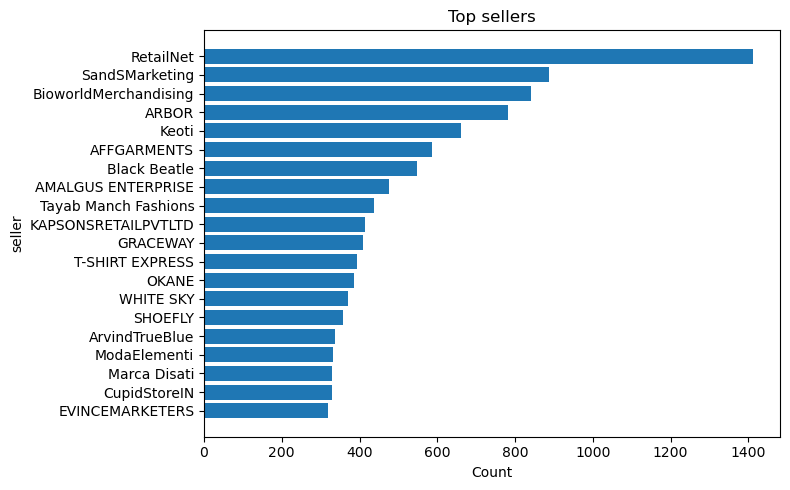

In [ ]:
top(df["seller"], n=20, title="Top sellers") # top sellers

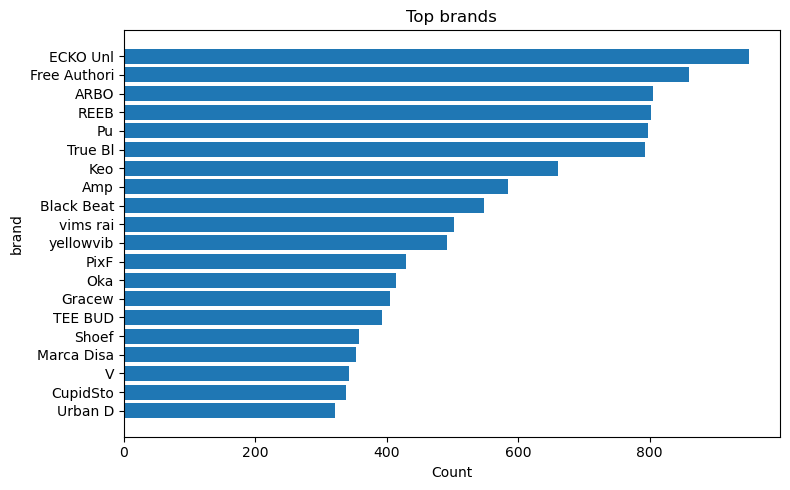

In [ ]:
top(df["brand"], n=20, title="Top brands") # top brands

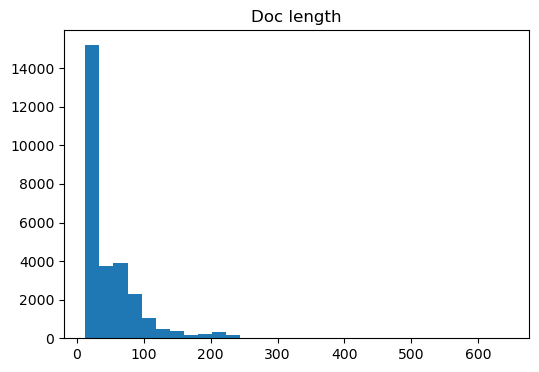

In [ ]:
doc_lengths = df["extra_fields"].astype(str).str.split().map(len)
plt.figure(figsize=(6,4)); plt.hist(doc_lengths, bins=30); plt.title("Doc length"); plt.show()

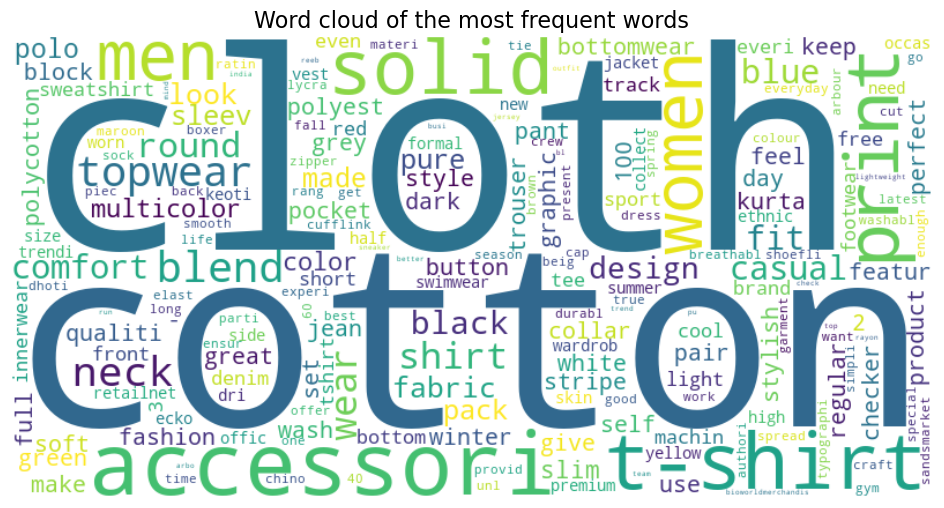

In [ ]:
word_freq = df["extra_fields_terms"].explode().value_counts().to_dict()

wc = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="viridis",
    max_words=200
).generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word cloud of the most frequent words", fontsize=16)
plt.show()